In [22]:
import anndata
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from kb_python.utils import import_matrix_as_anndata
from sklearn.linear_model import LinearRegression
from upsetplot import from_contents, from_indicators
from upsetplot import plot as upset
import muon
fsize = 15


def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, "white", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax

from diffmx import plot, compare

plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

# CR Peaks

In [23]:
raw = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/10xPBMC/atac_x/raw_kb_peaks.h5mu")
fil = muon.read_h5mu("/home/sina/projects/atac/scATAK/data/10xPBMC/atac_x/fil_kb_peaks.h5mu")

/home/sina/bin/miniconda3/lib/python3.7/site-packages/mudata/_core/mudata.py:450: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  f"Cannot join columns with the same name because {attr}_names are intersecting."


KeyboardInterrupt: 

In [3]:
print(raw_crcr)
print(raw_kbcr)

AnnData object with n_obs × n_vars = 430281 × 164487
AnnData object with n_obs × n_vars = 430281 × 164487
AnnData object with n_obs × n_vars = 10273 × 164487
AnnData object with n_obs × n_vars = 10273 × 164487


In [4]:
cr = crcr.copy()
kb = kbcr.copy()

raw_cr = raw_crcr.copy()
raw_kb = raw_kbcr.copy()

In [5]:
labels = ["kb", "cr"]
colors = ["#e41a1c", "#377eb8"]

In [8]:
%%time
# This takes a long time to run!!
# XX_XY = compare.l1_distance(kb.X, cr.X)
# YY_YX = compare.l1_distance(cr.X, kb.X)
XX_XY = compare.l1_distance(np.log1p(kb.X), np.log1p(cr.X))
YY_YX = compare.l1_distance(np.log1p(cr.X), np.log1p(kb.X))

CPU times: user 17h 28min 3s, sys: 16.5 s, total: 17h 28min 19s
Wall time: 23min 12s


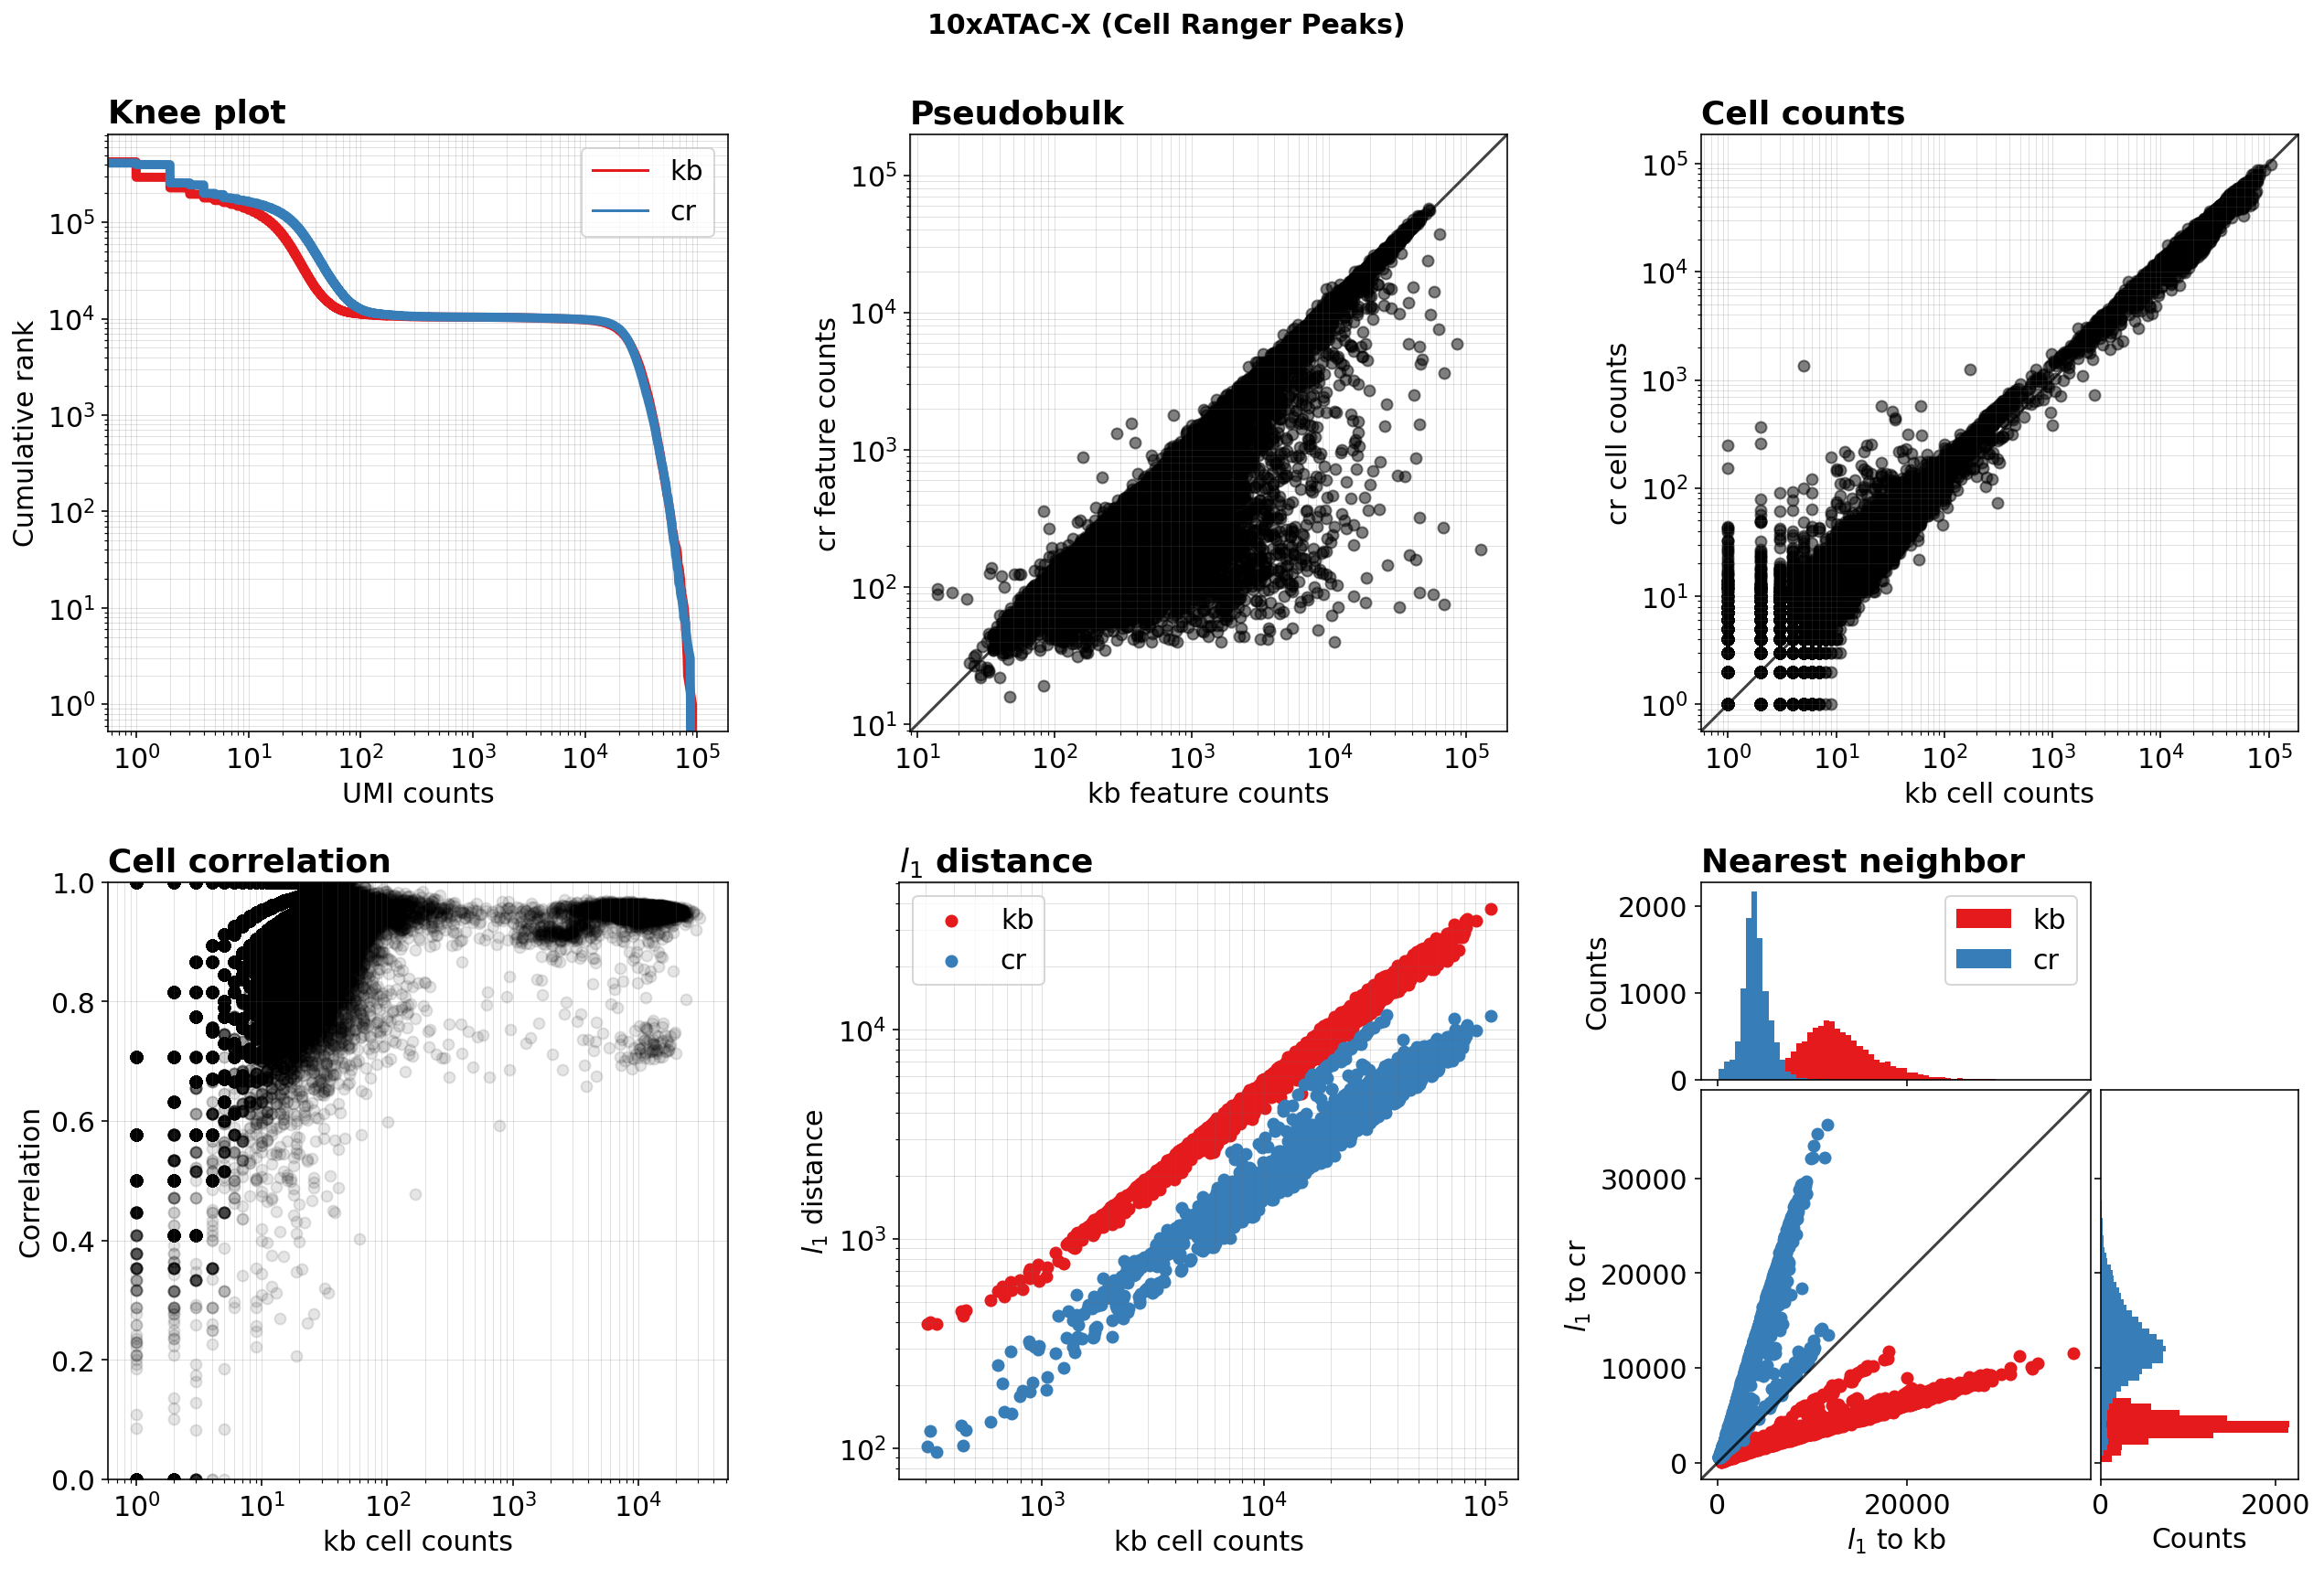

In [11]:
# Putting everything into one figure
row, col = (2, 3)
scale = 6

ds_name = "10xATAC-X (Cell Ranger Peaks)"

fig, axs = plt.subplots(figsize=(col*scale, row*scale), nrows=row, ncols=col)
fig.suptitle(ds_name, fontweight='bold', fontsize = fsize, x=0.5, y=0.999)

# knee plot
ax = axs[0,0]

title = "a"
x0,x1 = compare.rev_cdf(raw_kb.X, raw_cr.X, axis=1)
plot.rev_cdf(x0, x1, ax=ax, labels=labels, colors=colors, xlabel="UMI counts", title="Knee plot")

for line in ax.lines:
    line.set_linewidth(5.)


# pseudobulk
ax = axs[0,1]

title = "b"
x0, x1 = compare.cmp_sum(raw_kb.X, raw_cr.X)
plot.cmp_sum(x0, x1, ax=ax, alpha=0.5, xscale="log", yscale="log", xlabel=f"{labels[0]} feature counts", ylabel=f"{labels[1]} feature counts", title="Pseudobulk")
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# cell counts
ax = axs[0,2]

title = "c"
x0, x1 = compare.cmp_sum(raw_kb.X, raw_cr.X, axis=1)
plot.cmp_sum(x0, x1, ax=ax, alpha=0.5, xscale="log", yscale="log", xlabel=f"{labels[0]} cell counts", ylabel=f"{labels[1]} cell counts", title="Cell counts")


# features correlated
ax = axs[1,0]

title = "d"
x0, corr = compare.features_correlated(raw_kb.X>0, raw_cr.X>0)
plot.features_correlated(x0, corr, ax=ax, xlabel=f"{labels[0]} cell counts", title="Cell correlation")

# l1 counts
ax = axs[1,1]

title = "e"
cnts = compare.sum_features(kb.X, axis=1)
XX, XY = XX_XY
YY, YX = YY_YX

plot.l1_counts((cnts, XX), (cnts, XY), 
   ax=ax, 
   colors=colors,
   labels=labels,
   xlabel=f"{labels[0]} cell counts")

# nearest neighbor
ax = axs[1,2]

title = "f"
# note, taking log1p here
# XX_XY = compare.l1_distance(np.log1p(kb.X), np.log1p(cr.X))
# YY_YX = compare.l1_distance(np.log1p(cr.X), np.log1p(kb.X))
plot.l1_nearest_neighbor(XX_XY, YY_YX, 
                 ax=ax, 
                 labels=labels, 
                 colors=colors,
                 xlabel=f"$l_1$ to {labels[0]}",
                 ylabel=f"$l_1$ to {labels[1]}",
                 title="Nearest neighbor")

fig.tight_layout()
# fig.savefig(f"{ds_name}.png", dpi=300, bbox_inches="tight")
fig.show()

In [12]:
def _plt_color(lst):
    cols=[]
    for l in lst:
        if l>0.25 or l<-0.25:
            cols.append("red")
        elif l<=0.25 and l>=-0.25:
            cols.append('black')
    return cols

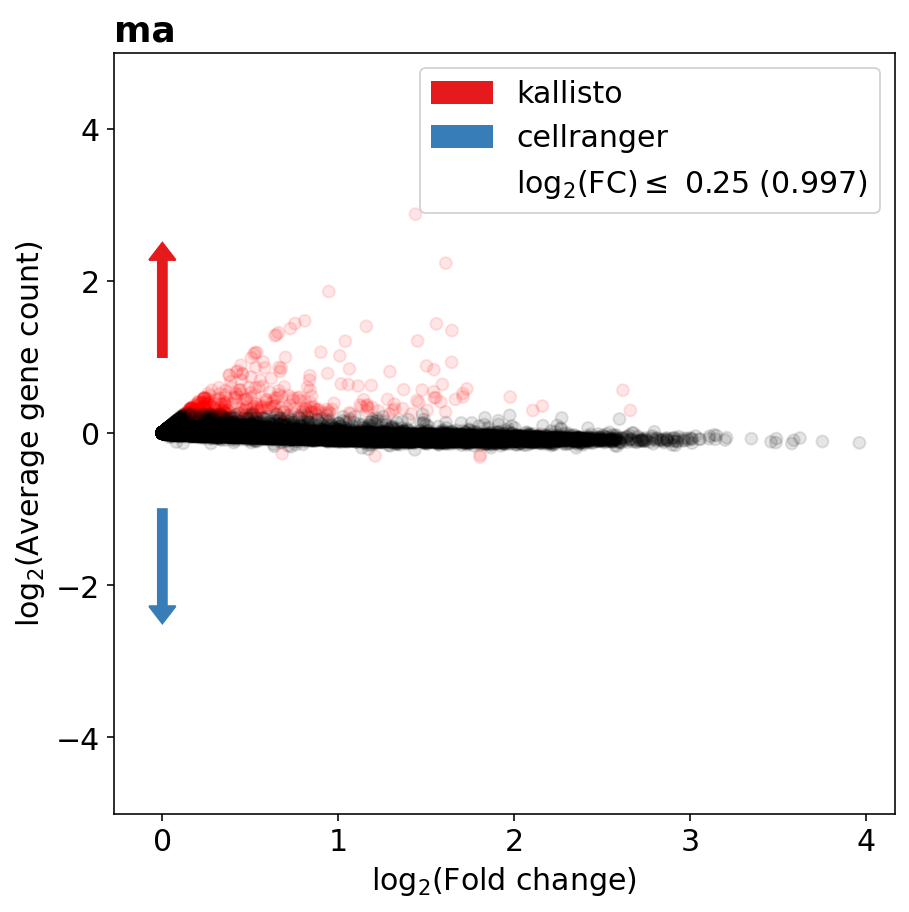

In [152]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(7,7))

title = "ma"

cols = _plt_color(M_AB)
ax.scatter(A_AB, M_AB, alpha=0.1, c=cols)

ax.set(**{
    "xlabel": "log$_2$(Fold change)",
    "ylabel": "log$_2$(Average gene count)",
    "ylim": (-5, 5)
})


ax.set_title(title, fontweight='bold', loc = 'left' )

A_patch = mpatches.Patch(color=kallisto_color, label="kallisto")
B_patch = mpatches.Patch(color=alevin_color, label="cellranger")
same = mpatches.Patch(color='white', label='log$_2$(FC)$\leq$ 0.25 ({:.3f})'.format(M_AB[M_AB<=0.25].shape[0]/M_AB.shape[0]))
ax.arrow(0, 1, 0, 1.5, length_includes_head=True, width=.05, color=kallisto_color)
ax.arrow(0, -1, 0, -1.5, length_includes_head=True, width=.05, color=alevin_color)
ax.legend(handles=[A_patch, B_patch, same], fontsize=fsize, loc="upper right")

fig.show()

# KB peaks

In [14]:
# load in matrices

# Cellranger
p = "/home/sina/projects/atac/scATAK/data/10xPBMC/data/atac_x/out_kb_peaks_cr_quant/cr-peaks/outs/raw_peak_bc_matrix/adata.h5ad"
crkb = anndata.read_h5ad(p)

# This dataset had revc barcodes, so correct
crkb.obs.index = crkb.obs.index.map(rc)

# These are the barcodes that pass filter
fbcs = pd.read_csv(
    "/home/sina/projects/atac/scATAK/data/10xPBMC/data/atac_x/out_kb_peaks_cr_quant/cr-peaks/outs/filtered_peak_bc_matrix/barcodes.txt", 
    header=None, names=["bcs"])["bcs"].apply(rc).sort_values().values

p = "/home/sina/projects/atac/scATAK/data/10xPBMC/data/atac_x/out_kb_peaks_kb_quant/kb-peaks/counts_mult/adata.h5ad"
kbkb = anndata.read_h5ad(p)

# Get the common barcodes
kbkbbcs = kbkb.obs.index.values
crkbbcs = crkb.obs.index.values

common_bcs = np.intersect1d(
    kbkbbcs, 
    crkbbcs
)



# Make raw matrices on common barcodes
raw_crkb = crkb[common_bcs].copy()
raw_kbkb = kbkb[common_bcs].copy()

crkb_peaks = raw_crkb.var.index.values
kbkb_peaks = raw_kbkb.var.index.values
common_peaks = np.intersect1d(
    kbkb_peaks, 
    crkb_peaks
)

# Make raw matrices on common barcodes
raw_crkb = raw_crkb[:,common_peaks].copy()
raw_kbkb = raw_kbkb[:,common_peaks].copy()

# Make filtered matrices on common barcodes
crkb = raw_crkb[fbcs].copy()
kbkb = raw_kbkb[fbcs].copy()

In [15]:
print(raw_crkb)
print(raw_kbkb)
print(crkb)
print(kbkb)

AnnData object with n_obs × n_vars = 446937 × 119572
AnnData object with n_obs × n_vars = 446937 × 119572
AnnData object with n_obs × n_vars = 10274 × 119572
AnnData object with n_obs × n_vars = 10274 × 119572


In [16]:
# sd = np.setdiff1d(kbkb_peaks, crkb_peaks, assume_unique=True)

In [17]:
cr = crkb.copy()
kb = kbkb.copy()

raw_cr = raw_crkb.copy()
raw_kb = raw_kbkb.copy()

In [18]:
print(cr)
print(kb)
print(raw_cr)
print(raw_kb)

AnnData object with n_obs × n_vars = 10274 × 119572
AnnData object with n_obs × n_vars = 10274 × 119572
AnnData object with n_obs × n_vars = 446937 × 119572
AnnData object with n_obs × n_vars = 446937 × 119572


In [19]:
labels = ["kb", "cr"]
colors = ["#e41a1c", "#377eb8"]

In [20]:
%%time
# This takes a long time to run!!
XX_XY = compare.l1_distance(np.log1p(kb.X), np.log1p(cr.X))
YY_YX = compare.l1_distance(np.log1p(cr.X), np.log1p(kb.X))

CPU times: user 17h 5min 59s, sys: 13.1 s, total: 17h 6min 12s
Wall time: 23min 21s


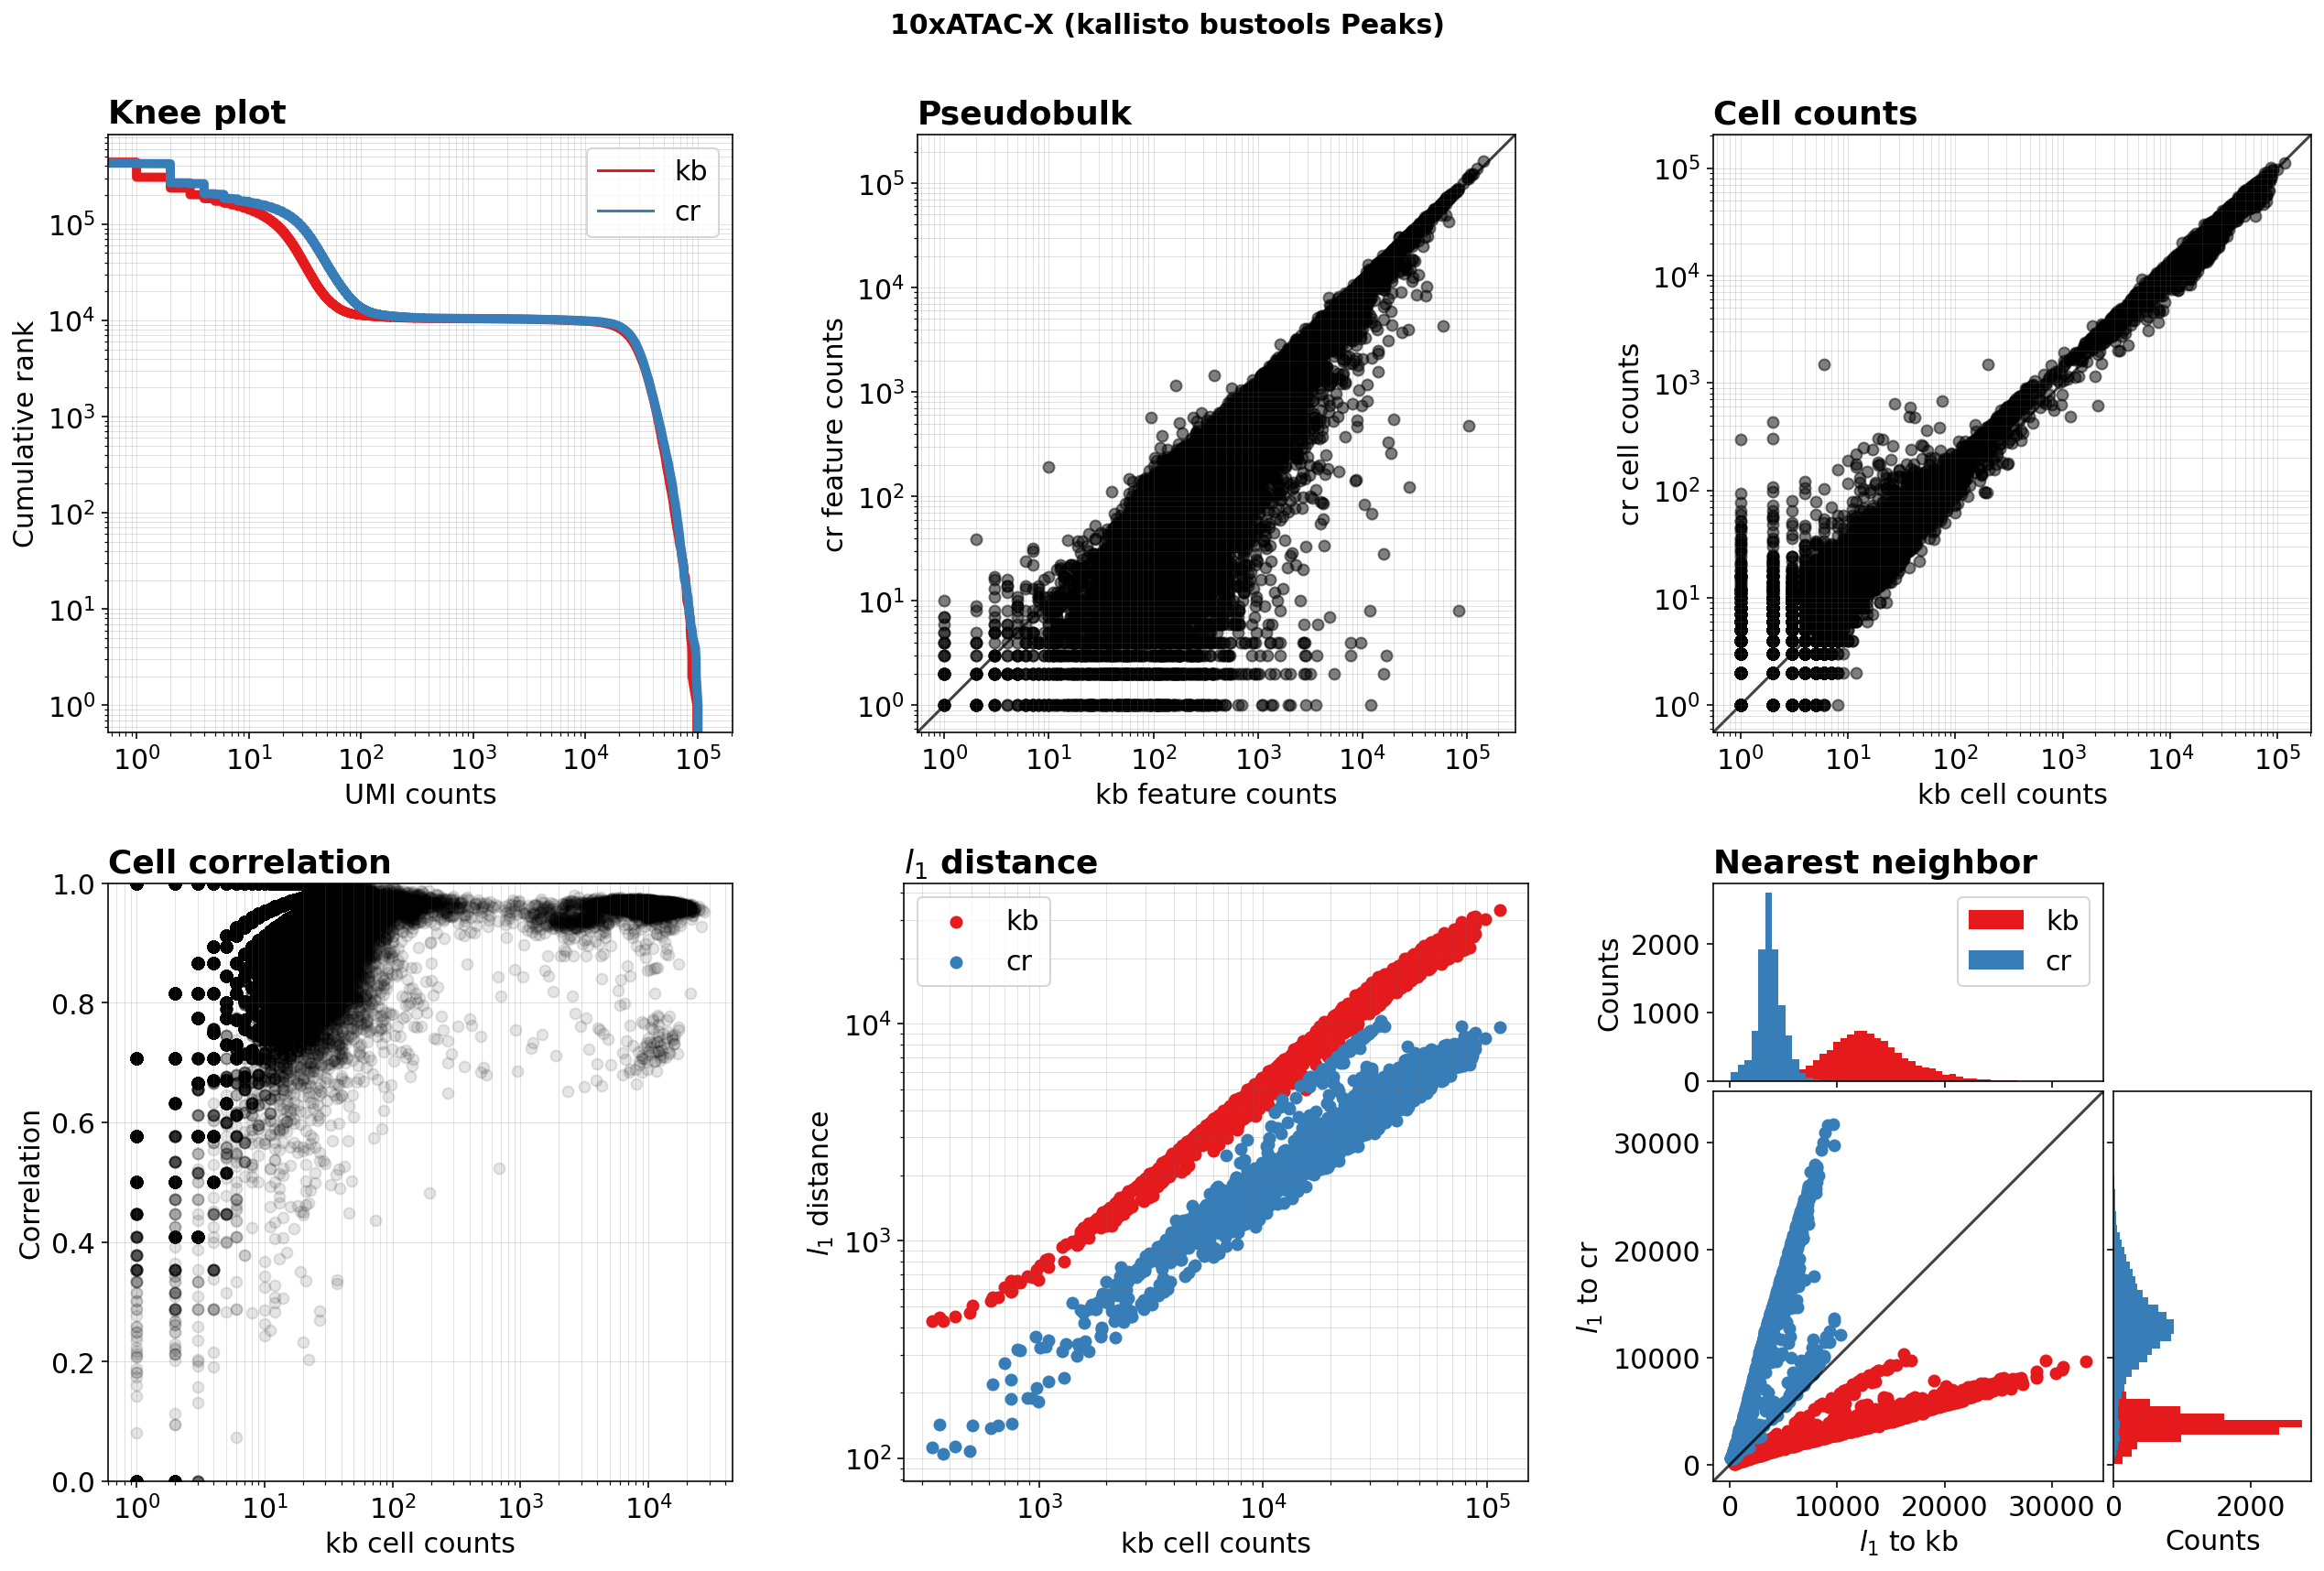

In [21]:
# Putting everything into one figure
row, col = (2, 3)
scale = 6

ds_name = "10xATAC-X (kallisto bustools Peaks)"

fig, axs = plt.subplots(figsize=(col*scale, row*scale), nrows=row, ncols=col)
fig.suptitle(ds_name, fontweight='bold', fontsize = fsize, x=0.5, y=0.999)

# knee plot
ax = axs[0,0]

title = "a"
x0,x1 = compare.rev_cdf(raw_kb.X, raw_cr.X, axis=1)
plot.rev_cdf(x0, x1, ax=ax, labels=labels, colors=colors, xlabel="UMI counts", title="Knee plot")

for line in ax.lines:
    line.set_linewidth(5.)


# pseudobulk
ax = axs[0,1]

title = "b"
x0, x1 = compare.cmp_sum(raw_kb.X, raw_cr.X)
plot.cmp_sum(x0, x1, ax=ax, alpha=0.5, xscale="log", yscale="log", xlabel=f"{labels[0]} feature counts", ylabel=f"{labels[1]} feature counts", title="Pseudobulk")
# ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
# ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

# cell counts
ax = axs[0,2]

title = "c"
x0, x1 = compare.cmp_sum(raw_kb.X, raw_cr.X, axis=1)
plot.cmp_sum(x0, x1, ax=ax, alpha=0.5, xscale="log", yscale="log", xlabel=f"{labels[0]} cell counts", ylabel=f"{labels[1]} cell counts", title="Cell counts")


# features correlated
ax = axs[1,0]

title = "d"
x0, corr = compare.features_correlated(raw_kb.X>0, raw_cr.X>0)
plot.features_correlated(x0, corr, ax=ax, xlabel=f"{labels[0]} cell counts", title="Cell correlation")

# l1 counts
ax = axs[1,1]

title = "e"
cnts = compare.sum_features(kb.X, axis=1)
XX, XY = XX_XY
YY, YX = YY_YX

plot.l1_counts((cnts, XX), (cnts, XY), 
   ax=ax, 
   colors=colors,
   labels=labels,
   xlabel=f"{labels[0]} cell counts")

# nearest neighbor
ax = axs[1,2]

title = "f"
# note, taking log1p here
# XX_XY = compare.l1_distance(np.log1p(kb.X), np.log1p(cr.X))
# YY_YX = compare.l1_distance(np.log1p(cr.X), np.log1p(kb.X))
plot.l1_nearest_neighbor(XX_XY, YY_YX, 
                 ax=ax, 
                 labels=labels, 
                 colors=colors,
                 xlabel=f"$l_1$ to {labels[0]}",
                 ylabel=f"$l_1$ to {labels[1]}",
                 title="Nearest neighbor")

fig.tight_layout()
# fig.savefig(f"{ds_name}.png", dpi=300, bbox_inches="tight")
fig.show()

In [ ]:
# features detected for the cell counts and cell correlation
fraction overlapping